In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session+

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# loding dataset

In [2]:
data_set=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

## exploring dataset

In [3]:
data_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# pd.set_option('display.max_rows', None)
print(data_set.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [5]:
sum(data_set.isnull().sum())

7829

In [6]:
dataset_drop=data_set.drop(['Id',"Alley","MiscFeature","Fence","PoolQC","FireplaceQu","MasVnrType","LotFrontage"],axis=1)

In [7]:
data=dataset_drop.dropna(axis=0)
sum(data.isnull().sum())

0

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

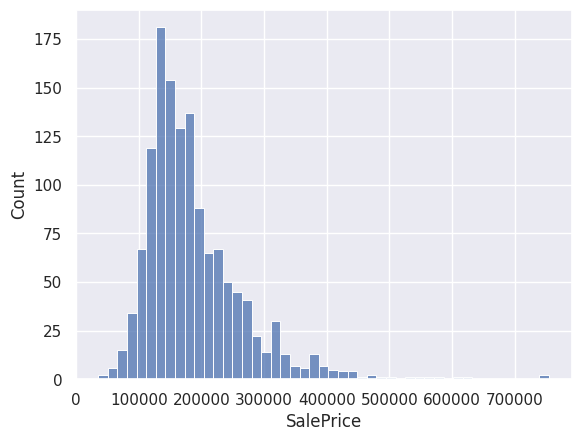

In [9]:
sns.histplot(data["SalePrice"])

## removing outliers

In [10]:
q=data["SalePrice"].quantile(0.99)

data_qunatile=data[data["SalePrice"]<q]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

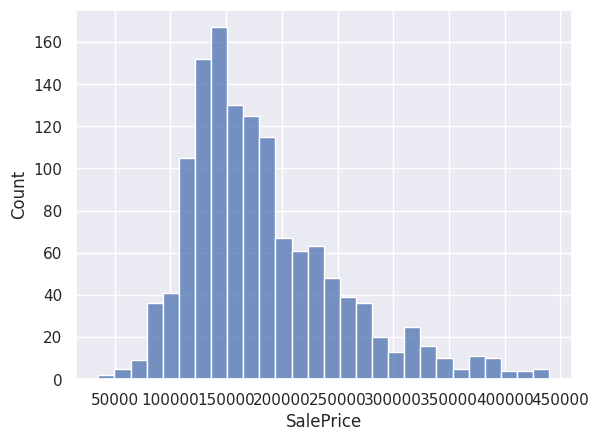

In [11]:
sns.histplot(data_qunatile["SalePrice"])

In [12]:
data_qunatile.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    

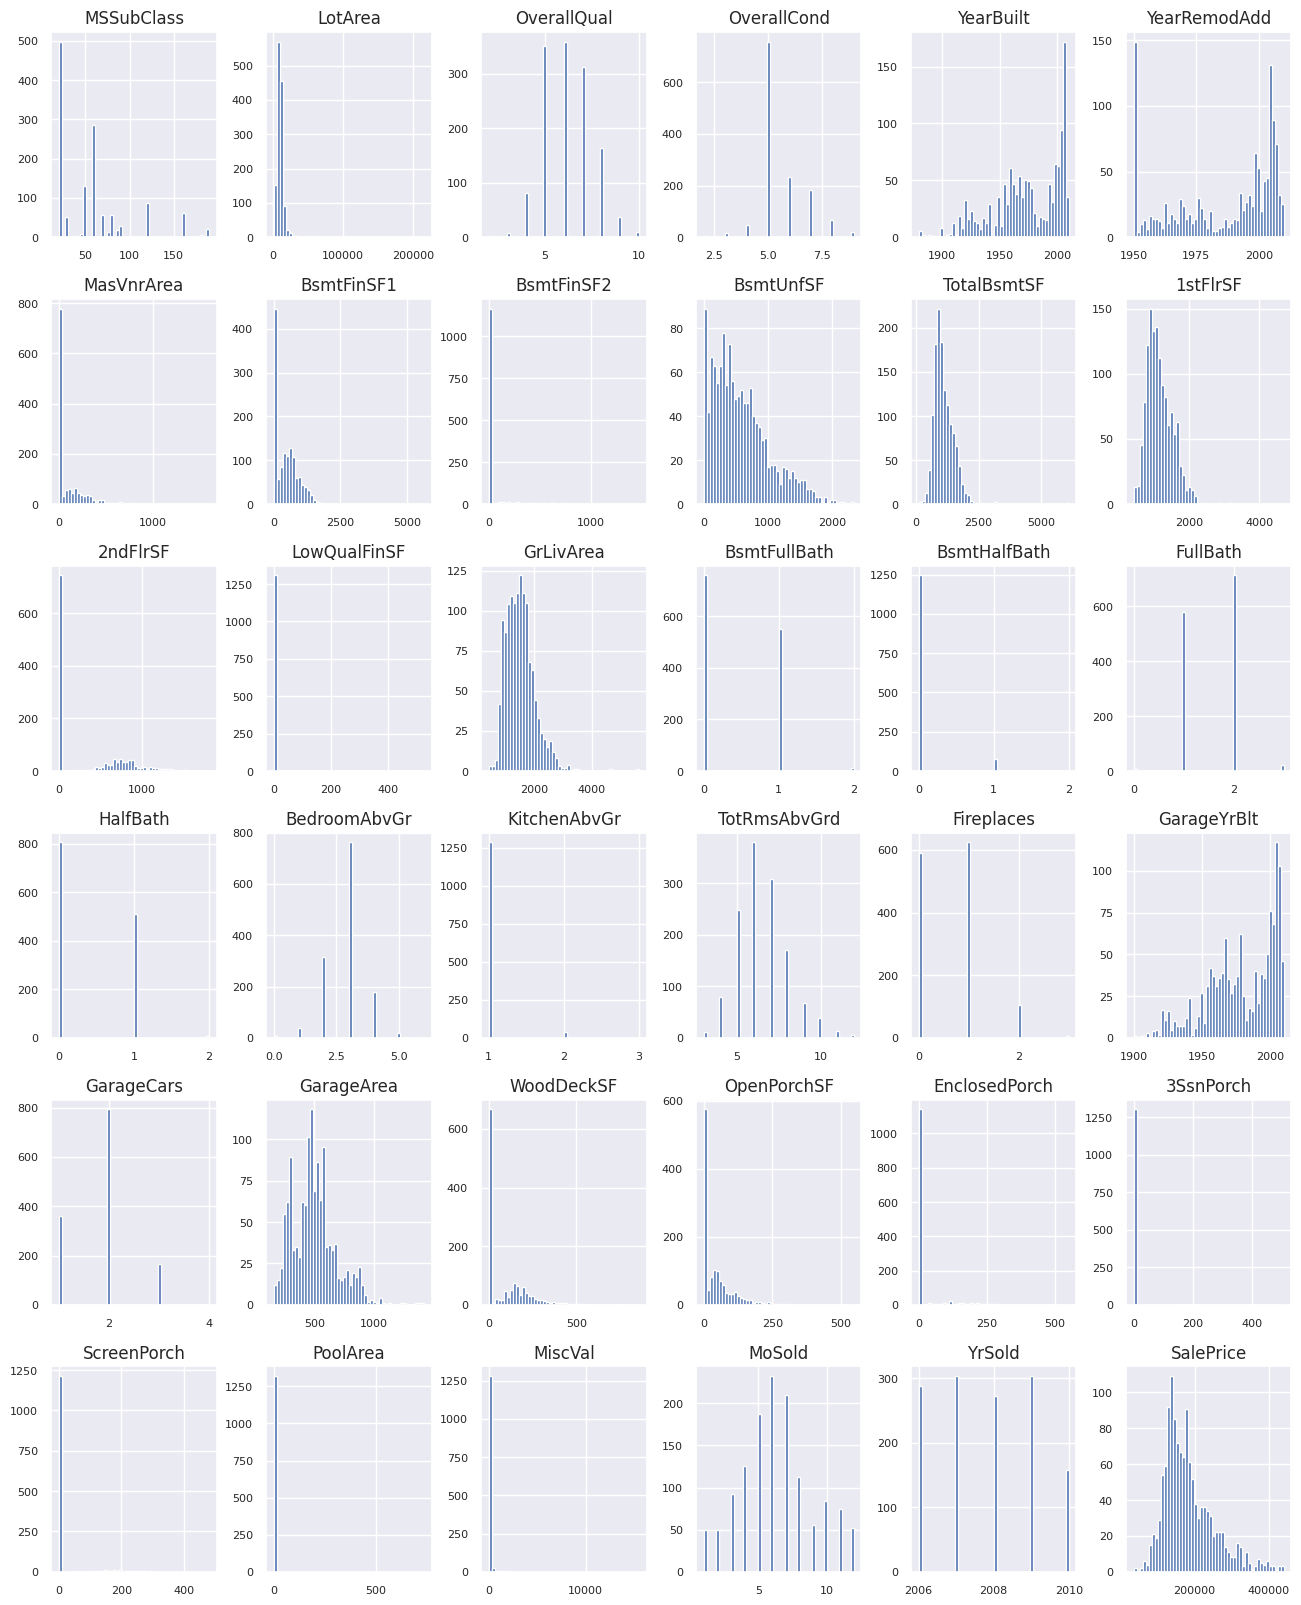

In [13]:
data_qunatile.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

#### observing from graph we have to perform log tranformation of 
#### and remove the outlier of 'LotArea' 

In [14]:
q=data_qunatile["LotArea"].quantile(0.98)

data_quantile2=data_qunatile[data_qunatile["LotArea"]<q]

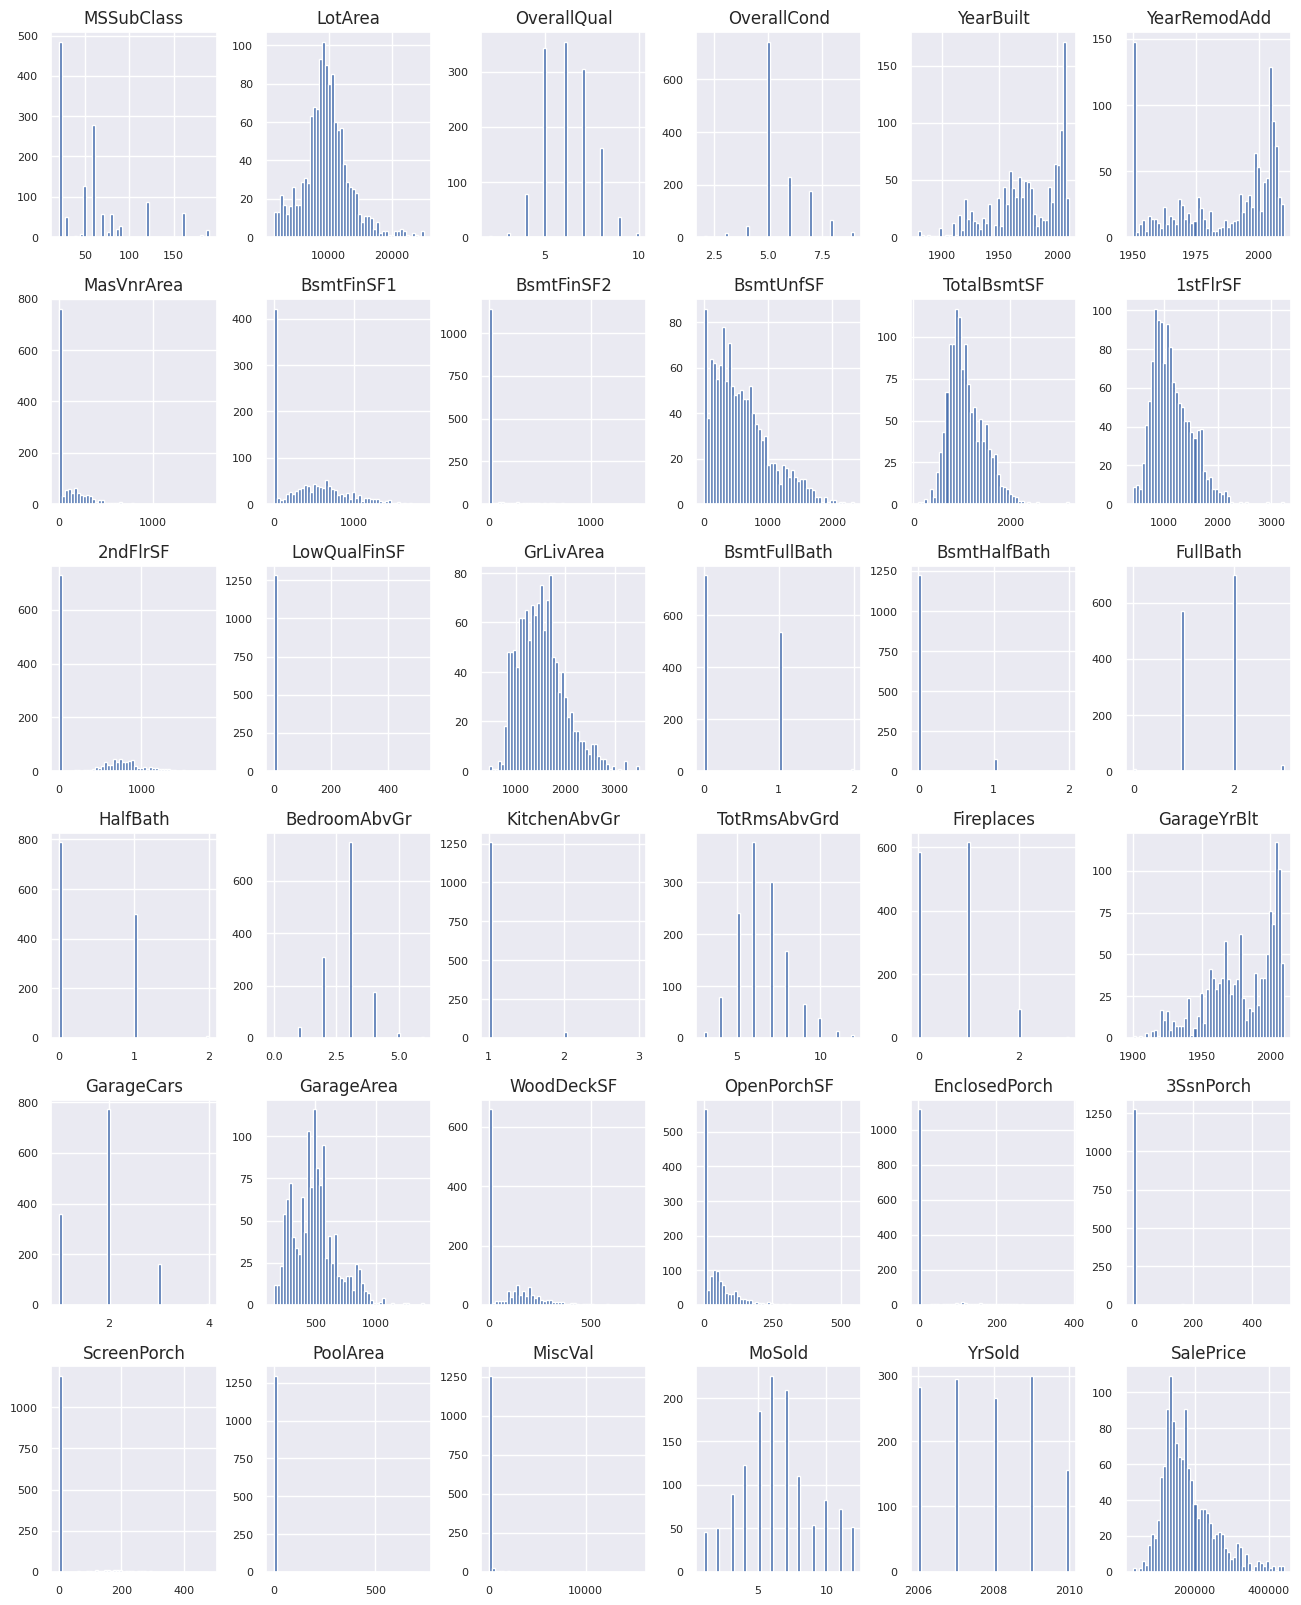

In [15]:
data_quantile2.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [16]:
# data_quantile2["BsmtUnfSF_log"]=np.log(data_quantile2["BsmtUnfSF"])

data_q3=data_quantile2.drop(["BsmtUnfSF"],axis=1)

# data_q3["GarageYrBlt_log"]=np.log(data_q3["GarageYrBlt"])
data_q4=data_q3.drop(["GarageYrBlt","YearBuilt",'YearRemodAdd'],axis=1)
data_q4.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSol

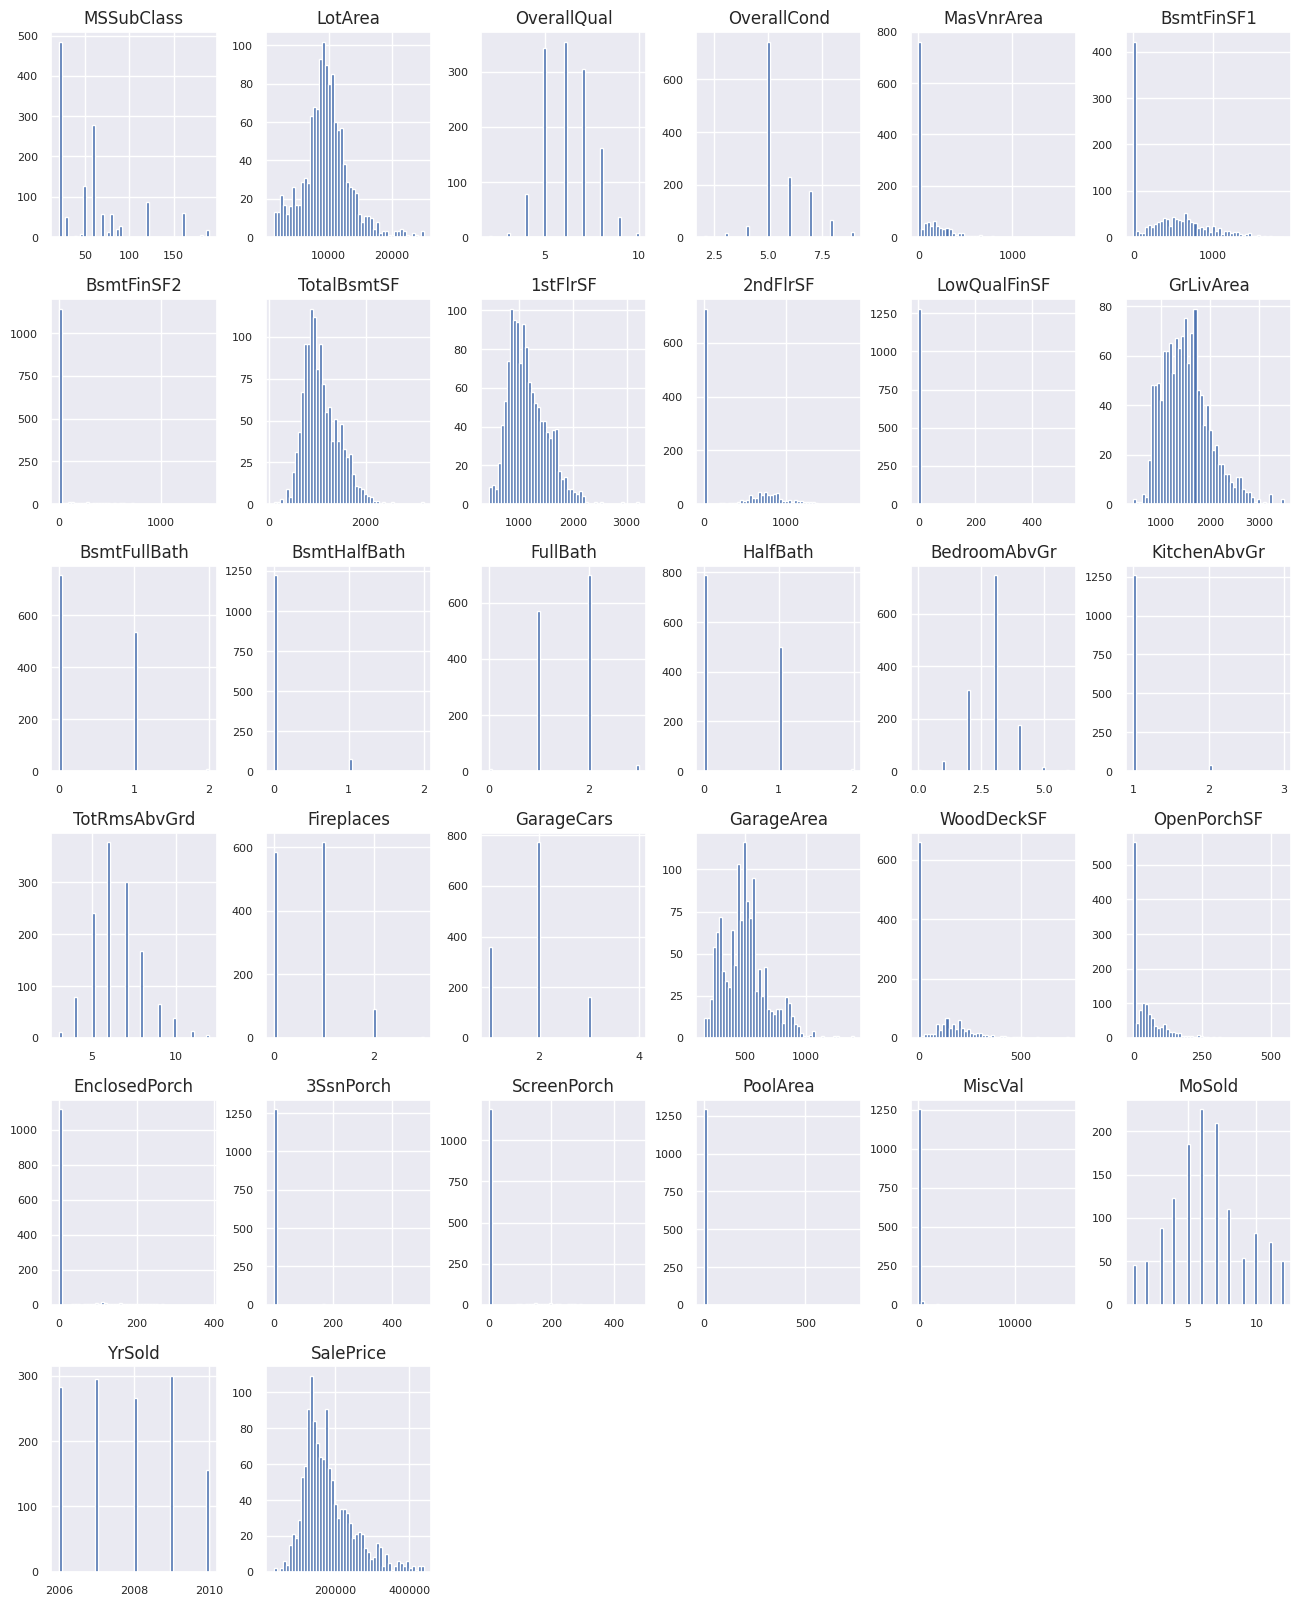

In [17]:
data_q4.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [18]:
## removing targets for dataset
targets=data_q4["SalePrice"]
inputs=data_q4.drop(["SalePrice"],axis=1)

## Adding dummies 

In [19]:
test_data=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")


In [20]:
sum(test_data .isnull().sum())

7878

In [21]:
## apllying same opration to test data
test_data_id=test_data["Id"]
test_data3=test_data.drop(['Id',"Alley","MiscFeature","Fence","PoolQC","FireplaceQu","MasVnrType","LotFrontage"],axis=1)
data_test4=test_data3.drop(["BsmtUnfSF"],axis=1)
data_test5=data_test4.drop(["GarageYrBlt","YearBuilt",'YearRemodAdd'],axis=1)

In [22]:
inputs.shape,data_test5.shape

((1297, 68), (1459, 68))

In [23]:
combined_data = pd.concat([inputs, data_test5], axis=0)

In [24]:
data_with_dummies=pd.get_dummies(combined_data,drop_first=True)

In [25]:
data_with_dummies.shape

(2756, 221)

In [26]:
print(sum(data_with_dummies.isnull().sum()))

24


In [27]:
# Split back into training and test datasets
train_data_with_dummies = data_with_dummies.iloc[:len(inputs), :]
test_data_with_dummies = data_with_dummies.iloc[len(inputs):len(data_with_dummies), :]

In [28]:
test_data_with_dummies["Id"]=test_data_id

test_data_with_dummies =test_data_with_dummies .dropna(axis=0)
sum(test_data_with_dummies .isnull().sum())

/tmp/ipykernel_18/400998895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_with_dummies["Id"]=test_data_id


0

In [29]:
test_ids=test_data_with_dummies["Id"]

In [30]:
test_data_without_id=test_data_with_dummies.drop(["Id"],axis=1)


In [31]:
sum(test_data_without_id .isnull().sum())

0

In [32]:
data_with_dummies.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,706.0,0.0,856.0,856,854,...,False,False,False,False,True,False,False,False,True,False
1,20,9600,6,8,0.0,978.0,0.0,1262.0,1262,0,...,False,False,False,False,True,False,False,False,True,False
2,60,11250,7,5,162.0,486.0,0.0,920.0,920,866,...,False,False,False,False,True,False,False,False,True,False
3,70,9550,7,5,0.0,216.0,0.0,756.0,961,756,...,False,False,False,False,True,False,False,False,False,False
4,60,14260,8,5,350.0,655.0,0.0,1145.0,1145,1053,...,False,False,False,False,True,False,False,False,True,False


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [34]:
scaler=StandardScaler()

In [35]:
# input_scaled=scaler.fit_transform(inputs)
input_scaled=train_data_with_dummies
targets_array=np.array(targets)

# test train split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(input_scaled,targets_array,test_size=0.2,random_state=144)

In [37]:
x_train.shape,y_train.shape

((1037, 221), (1037,))

In [38]:
x_test.shape,y_test.shape

((260, 221), (260,))

## regression model

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
reg=LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [41]:
y_hat=reg.predict(x_train)

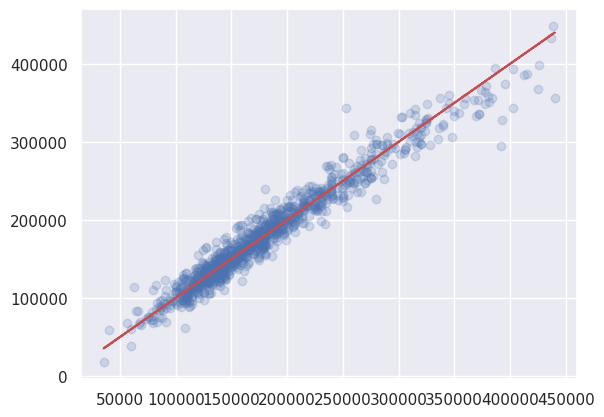

In [42]:
plt.scatter(y_train,y_hat,alpha=0.2)
plt.plot(y_train,y_train,c="r")

In [43]:
reg.score(x_train,y_train)

0.9506514201913971

## model on test data

In [44]:
y_hat_test=reg.predict(x_test)

In [45]:
np.min(y_hat_test),np.max(y_hat_test)

(47677.917151268164, 430980.0757033525)

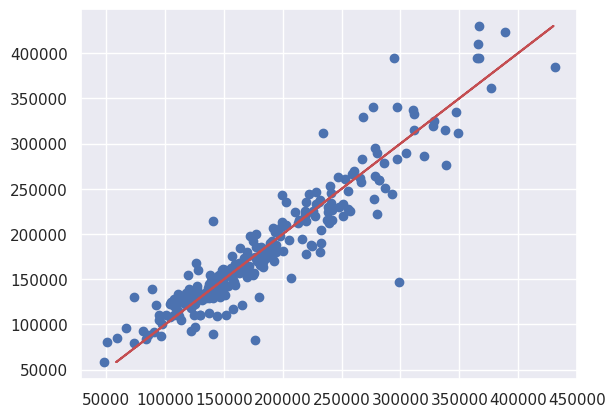

In [46]:
plt.plot(y_test,y_test,c="r")
plt.scatter(y_hat_test,y_test)

In [47]:
reg.score(x_test,y_test)

0.873434473091826

## prediction of test fie  of kaggle comp.

In [48]:
reg.predict(test_data_without_id)

array([112457.99526873, 175572.27171613, 186876.2113169 , ...,
       186383.72225809,  76331.11806562, 228873.24382124])

In [49]:
# result_data=pd.DataFrame(data=[test_ids],[reg.predict(test_data_without_id)],columns=["Id","SalePrice"])
result_data = pd.DataFrame({"Id": test_ids, "SalePrice": reg.predict(test_data_without_id)})

In [50]:
result_data.head()

,Id,SalePrice
0,1461,112457.995269
1,1462,175572.271716
2,1463,186876.211317
3,1464,196108.670879
4,1465,208919.375809


In [51]:
result_data.to_csv("submission.csv", index=False)